In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sy
import qexpy as q

In [2]:
def uprime(u,delta):
  return u*(1/(1+delta))-(delta/(1+delta))

def upaper(u,delta):
  return u-(delta/(1+delta))
def gauss(x,mu,sigma):
    normalization = 1/(np.sqrt(2*np.pi)*sigma)
    numerator = -(x-mu)**2
    denominator = 2*sigma**2
    return normalization*np.exp(numerator/denominator)

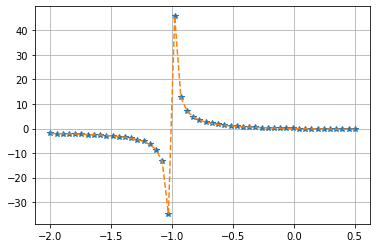

In [3]:
u=0.001
x = np.linspace(u-2,u+0.5,50)
y = uprime(u,x)
yy=upaper(u,x)
plt.grid(True, which="both")
plt.plot(x,y,"*")
plt.plot(x,yy,"--")
plt.show()



--------- PARAMETERS u=1e-0 -----------------
[0.07199946 0.001072  ]
--------------------------------------
Integral_numerical =  1.0


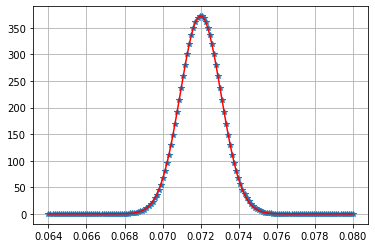

--------- PARAMETERS u=1e-1 -----------------
[0.24177716 0.00124178]
--------------------------------------
Integral_numerical =  1.0


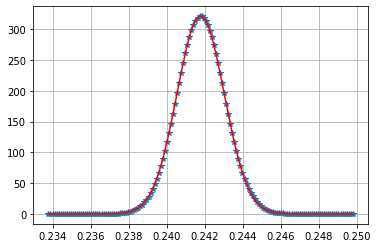

--------- PARAMETERS u=1e-2 -----------------
[0.41155485 0.00141155]
--------------------------------------
Integral_numerical =  0.0


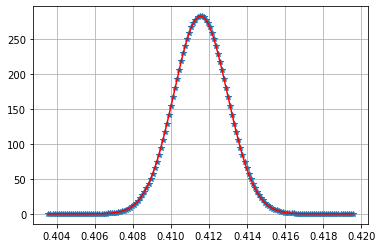

--------- PARAMETERS u=1e-3 -----------------
[0.58133254 0.00158133]
--------------------------------------
Integral_numerical =  0.0


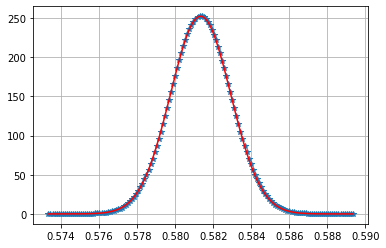

--------- PARAMETERS u=1e-4 -----------------
[0.75111024 0.00175111]
--------------------------------------
Integral_numerical =  0.0


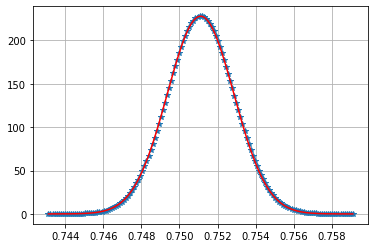

--------- PARAMETERS u=1e-5 -----------------
[0.92088793 0.00192089]
--------------------------------------
Integral_numerical =  0.0


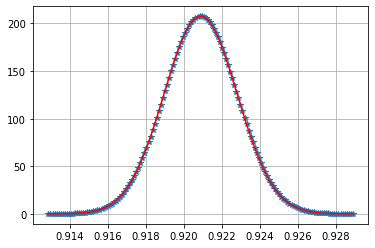

--------- PARAMETERS u=1e-6 -----------------
[1.09066562 0.00209066]
--------------------------------------
Integral_numerical =  0.0


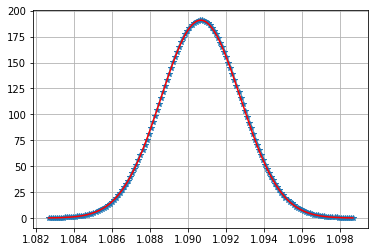

--------- PARAMETERS u=1e-7 -----------------
[1.26044331 0.00226044]
--------------------------------------
Integral_numerical =  0.0


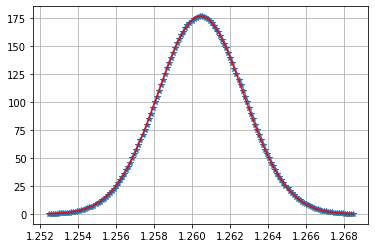

--------- PARAMETERS u=1e-8 -----------------
[1.43022101 0.00243022]
--------------------------------------
Integral_numerical =  0.0


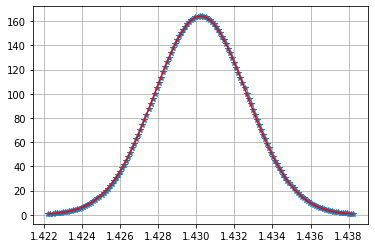

--------- PARAMETERS u=1e-9 -----------------
[1.59999869 0.0026    ]
--------------------------------------
Integral_numerical =  0.0


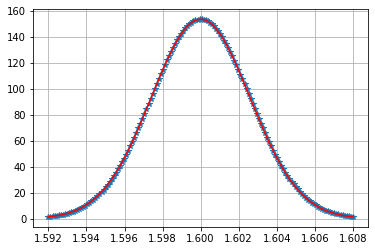

In [4]:
def pdf_bending(x,sigma,u):
    normalization = (1+u)/(np.sqrt(2*np.pi)*sigma*(1+x)**2)
    numerator = -(u-x)**2
    denominator = 2*(sigma*(1+x))**2
    return normalization*np.exp(numerator/denominator)

sigma=1e-3
U=np.linspace(0.072,1.6,10)
X = [np.linspace(u-8*sigma,u+8*sigma,150) for u in U]
j = 0
Parameters=[]
for u in U:    
    x = np.array(X[j])
    y = pdf_bending(x,sigma,u)
    guesses = [sigma,u]
    params = sp.optimize.curve_fit(gauss, x,y,p0=guesses)
    y_fit = gauss(x,*params[0]) 
    Parameters.append(params[0])
    print("--------- PARAMETERS u=1e-%d -----------------" %j)
    print(params[0])
    print("--------------------------------------")
    plt.grid(True, which="both")
    plt.plot(x,y,"*")
    plt.plot(x,y_fit,"r-")
    #I1 = sp.integrate.quad(pdf_bending, -np.inf,-1, args=(sigma,u))
    #I2 = sp.integrate.quad(pdf_bending, -1,np.inf, args=(sigma,u))
    #I = I1[0]+I2[0]
    I_numerical = sp.integrate.quad(gauss, -np.inf,np.inf, args=(round(params[0][0],j-1),params[0][1]))
    #print ("Integral_pdf = ", I)
    print ("Integral_numerical = ", round(I_numerical[0],6))
    j=j+1
    plt.show()


---------------- u range -----------------------
0.07028723999578276 1.6282658231241456
---------------first approximation-----------


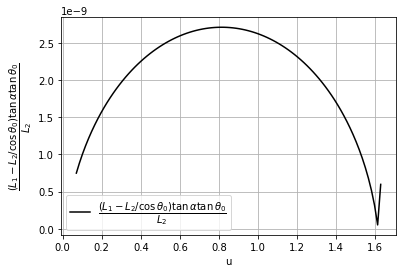

-----------------------------------------------------------------------------------
second approximation =  -4.554397e-06
-------------third approximation----------------------


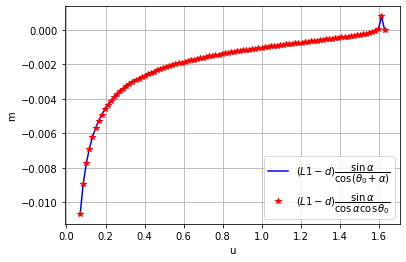

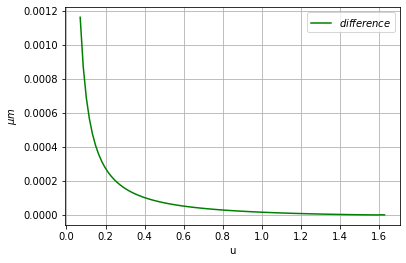

---------------the sigma terms given in microns ----------
sigma_x =  164.317
sigma_y =  15.492
sigma_xprime =  1.643
sigma_yprime =  0.775
---------------scattering angle electron--------------------------


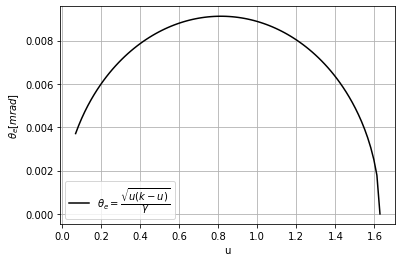

In [5]:
#error propagation for the different terms:

omega0 = 2.331     # eV
epsilon0 = 45.6e+9 # eV
mc2 = 0.511e+6     # eV
k = 4*omega0*epsilon0/(mc2**2)


gamma = 89237  #
epsilonx = 270e-12 # m rad
epsilony = 12e-12  # m rad
betax = 100        # m
betay = 20         # m
Dx = 25e-3         # m
theta0 = 2.1341e-3 # rad
UsCosTheta0 = 1/np.cos(theta0) 
sigmad = 0.001
L1 = 117           # m
L2 = 100           # m

umin = np.arctan(15e-5)/theta0

u = np.linspace(umin,k,100)
thetae = np.sqrt(u*(k-u))
thetagamma = np.sqrt(k/u-1)


print("---------------- u range -----------------------")
print(umin,k)

sigma_x = np.sqrt(epsilonx*betax) 
sigma_y = np.sqrt(epsilony*betay)


sigma_xprime = np.sqrt(epsilonx/betax) 
sigma_yprime = np.sqrt(epsilony/betay)

alpha = sigma_xprime-(thetae/(gamma*(1+sigmad)))
alpha_gamma = sigma_xprime-(thetagamma/(gamma*(1+sigmad)))
approximation = (L1-L2*UsCosTheta0)*np.tan(alpha)*np.tan(theta0)
approximation2_exact = (L1-(sigma_x+Dx*sigmad)/(np.tan(alpha)))*np.sin(alpha_gamma)/(np.cos(theta0)*np.cos(alpha_gamma)-np.sin(theta0)*np.sin(alpha_gamma))
approximation2_approx = (L1-(sigma_x+Dx*sigmad)/(np.tan(alpha)))*np.sin(alpha_gamma)/(np.cos(theta0)*np.cos(alpha_gamma))
difference_2 = np.abs(approximation2_exact-approximation2_approx)

print("---------------first approximation-----------")
plt.grid(True, which="both")
plt.plot(u,np.abs(approximation/(L2)),"k-")
plt.xlabel("u")
plt.ylabel(r"$\dfrac{\left(L_1-L_2/\cos\theta_0\right)\tan\alpha\tan\theta_0}{L_2}$")
plt.legend([r"$\dfrac{\left(L_1-L_2/\cos\theta_0\right)\tan\alpha\tan\theta_0}{L_2}$"])
plt.show()
print("-----------------------------------------------------------------------------------")

print("second approximation = ","{:2e}".format(1-UsCosTheta0**2))

print("-------------third approximation----------------------")
plt.grid(True, which="both")
plt.plot(u,approximation2_exact,"b-")
plt.plot(u,approximation2_approx,"r*")
plt.xlabel("u")
plt.ylabel(r"m")
plt.legend([r"$(L1-d)\dfrac{\sin\alpha}{\cos(\theta_0+\alpha)}$",r"$(L1-d)\dfrac{\sin\alpha}{\cos\alpha\cos\theta_0}$"])
plt.show()

plt.grid(True, which="both")
plt.plot(u,difference_2*1e+6,"g-")
plt.xlabel("u")
plt.ylabel(r"$μ m$")
plt.legend([r"$difference$"])
plt.show()


print("---------------the sigma terms given in microns ----------")
print("sigma_x = ","{:.3f}".format(sigma_x*1e+6))
print("sigma_y = ","{:.3f}".format(sigma_y*1e+6))
print("sigma_xprime = ","{:.3f}".format(sigma_xprime*1e+6))
print("sigma_yprime = ","{:.3f}".format(sigma_yprime*1e+6))


print("---------------scattering angle electron--------------------------")
plt.grid(True, which="both")
plt.plot(u,thetae*1e+3*(1/gamma),"k-")
plt.xlabel("u")
plt.ylabel(r"$\theta_e[m rad]$")
plt.legend([r"$\theta_e=\dfrac{\sqrt{u(k-u)}}{\gamma}$"])
plt.show()

firstterm = Dx*UsCosTheta0*sigmad 
secondterm = UsCosTheta0*sigma_x 
thirdterm = UsCosTheta0*L1*(np.cos(sigma_xprime)**(-2))*sigma_xprime
fourthterm = UsCosTheta0*L1*(np.cos(thetae/(gamma*(1+0)))**(-2))*(thetae/(gamma*(1+0)**2))*sigmad
fifthterm = L2*(np.cos(u*theta0/(1+0))**(-2))*((theta0*u)/(1+0)**2)*sigmad
sixthterm = L2*(np.cos(sigmad*theta0/(1+0))**(-2))*((theta0)/(1+0)**2)*sigmad
 
terms = [firstterm,secondterm,thirdterm,fourthterm,fifthterm,sixthterm]
labels = [r"$\sigma_{\theta_e}$[μ m]", r"$\sigma_{\theta_0}[μ m]$"]




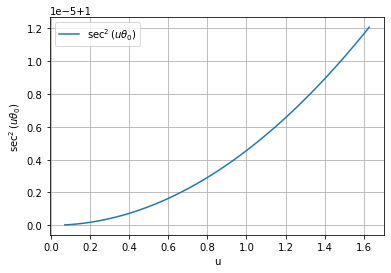

--------------------Secants--------------------
$L_1\sec^2(\theta_e) = $ [130.80908813 134.00619772 137.23708471 140.49919632 143.78978502
 147.10590591 150.44441469 153.80196654 157.17501581 160.55981665
 163.95242464 167.34869951 170.74430898 174.13473373 177.51527368
 180.88105548 184.22704135 187.54803926 190.8387144  194.09360211
 197.30712209 200.47359396 203.58725416 206.64227408 209.6327794
 212.55287054 215.39664419 218.15821573 220.83174251 223.41144774
 225.89164503 228.26676319 230.53137136 232.68020407 234.70818622
 236.61045771 238.3823975  240.01964696 241.51813229 242.87408584
 244.08406605 245.14497601 246.05408023 246.80901972 247.40782504
 247.84892732 248.13116702 248.25380052 248.21650429 248.01937675
 247.6629377  247.14812539 246.47629118 245.64919198 244.66898037
 243.53819268 242.25973489 240.83686686 239.2731846  237.57260109
 235.73932569 233.77784222 231.69288618 229.48942096 227.17261352
 224.74780956 222.22050853 219.59633843 216.88103089 214.08039643
 211

In [7]:
plt.grid(True, which="both")
angle = u*theta0
plt.plot(u,np.cos(angle)**(-2))
plt.xlabel('u')
plt.ylabel(r"$\sec^2(u\theta_0)$")
plt.legend([r"$\sec^2(u\theta_0)$"])
plt.show()
print("--------------------Secants--------------------")
print(r"$L_1\sec^2(\theta_e) = $",L1*np.cos(thetae)**(-2))

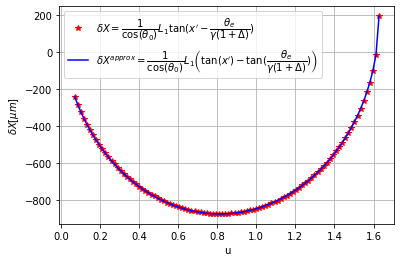

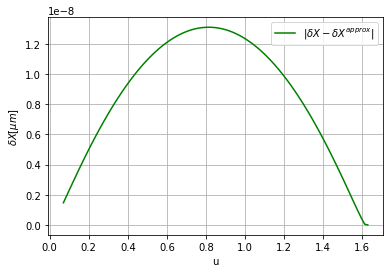

In [8]:
angle = sigma_xprime-thetae/(gamma*(1+sigmad))
analytical_expression = UsCosTheta0*L1*np.tan(angle)
numerical_approximation = UsCosTheta0*L1*np.tan(sigma_xprime)-UsCosTheta0*L1*np.tan(thetae/(gamma*(1+sigmad)))
difference = np.abs(analytical_expression-numerical_approximation)

plt.grid(True, which="both")
plt.plot(u,analytical_expression*1e+6,"r*")
plt.plot(u,numerical_approximation*1e+6,"b-")
plt.xlabel("u")
plt.ylabel(r"$δ X[\mu m]$")
plt.legend([r"$δX=\dfrac{1}{\cos(\theta_0)}L_1\tan(x'-\dfrac{\theta_e}{\gamma(1+\Delta)})$",r"$δ X^{approx}=\dfrac{1}{\cos(\theta_0)}L_1\left(\tan(x')-\tan(\dfrac{\theta_e}{\gamma(1+\Delta)})\right)$"])
plt.show()

plt.grid(True, which="both")
plt.plot(u,difference*1e+6,"g-")
plt.xlabel("u")
plt.ylabel(r"$δ X[μ m]$")
plt.legend([r"$|\delta X-δ X^{approx}|$"])
plt.show()


----------------MUCHNOI VS DOCUMENT -----------------------


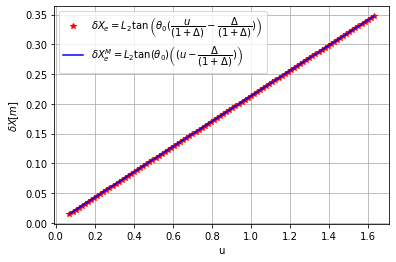

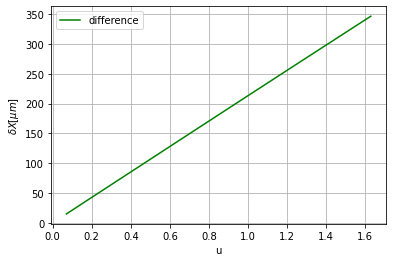

----------------MUCHNOI VS DOCUMENT high U range-----------------------


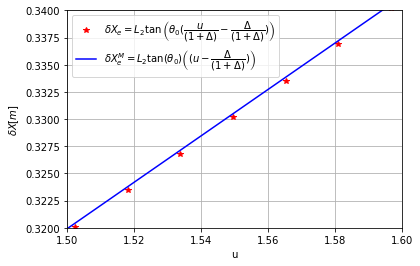

----------------------SMALL ANGLE VS ANALYTICAL-----------------------


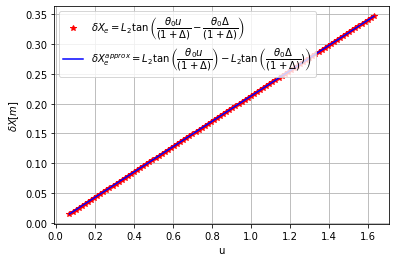

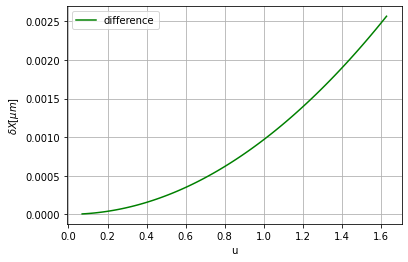

In [14]:
termino_analitico = L2*np.tan(theta0*(u/(1+sigmad)-(sigmad/(1+sigmad))))
termino_aproximado = L2*np.tan(theta0)*(u-(sigmad/(1+sigmad)))
small_angle_approx = L2*np.tan(theta0*(u/(1+sigmad)))-L2*np.tan(theta0*(sigmad/(1+sigmad)))
print("----------------MUCHNOI VS DOCUMENT -----------------------")
plt.grid(True, which="both")
plt.plot(u,termino_analitico,"r*")
plt.plot(u,termino_aproximado,"b-")
plt.xlabel("u")
plt.ylabel(r"$δ X[m]$")
plt.legend([r"$δ X_e=L_2\tan\left(\theta_0(\dfrac{u}{(1+\Delta)}-\dfrac{\Delta}{(1+\Delta)})\right)$",r"$δ X_e^M=L_2\tan(\theta_0)\left((u-\dfrac{\Delta}{(1+\Delta)})\right)$"])
plt.show()

plt.grid(True, which="both")
plt.plot(u,np.abs(termino_analitico-termino_aproximado)*1e+6,"g-")
plt.xlabel("u")
plt.ylabel(r"$δ X[μ m]$")
plt.legend(["difference"])
plt.show()
print("----------------MUCHNOI VS DOCUMENT high U range-----------------------")
plt.grid(True, which="both")
plt.plot(u,termino_analitico,"r*")
plt.plot(u,termino_aproximado,"b-")
plt.xlim([1.5,1.6])
plt.ylim([0.32,0.34])
plt.xlabel("u")
plt.ylabel(r"$δ X[m]$")
plt.legend([r"$δ X_e=L_2\tan\left(\theta_0(\dfrac{u}{(1+\Delta)}-\dfrac{\Delta}{(1+\Delta)})\right)$",r"$δ X_e^M=L_2\tan(\theta_0)\left((u-\dfrac{\Delta}{(1+\Delta)})\right)$"])
plt.show()


print("----------------------SMALL ANGLE VS ANALYTICAL-----------------------")

plt.grid(True, which="both")
plt.plot(u,termino_analitico,"r*")
plt.plot(u,small_angle_approx,"b-")
plt.xlabel("u")
plt.ylabel(r"$δ X[m]$")
plt.legend([r"$δ X_e=L_2\tan\left(\dfrac{\theta_0 u}{(1+\Delta)}-\dfrac{\theta_0\Delta}{(1+\Delta)}\right)$",r"$δ X_e^{approx}=L_2\tan\left(\dfrac{\theta_0 u}{(1+\Delta)}\right)-L_2\tan\left(\dfrac{\theta_0\Delta}{(1+\Delta)})\right)$"])
plt.show()

plt.grid(True, which="both")
plt.plot(u,np.abs(termino_analitico-small_angle_approx)*1e+6,"g-")
plt.xlabel("u")
plt.ylabel(r"$δ X[μ m]$")
plt.legend(["difference"])
plt.show()

---------------the term 1 is given in microns ----------
25.00
---------------the term 2 is given in microns ----------
164.32
---------------the term 3 is given in microns ----------
192.25
---------------the term 4 is given in microns ----------
1.067


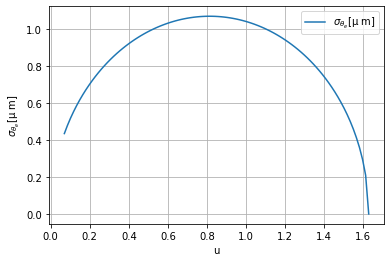

---------------the term 5 is given in microns ----------
347.492


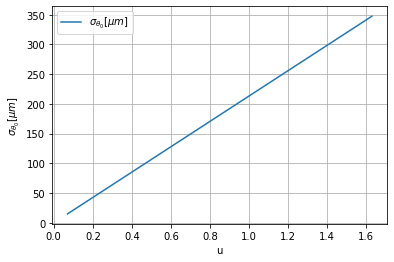

---------------the term 6 is given in microns ----------
213.41


In [23]:
for i in range(6):
    print("---------------the term %d is given in microns ----------" %(i+1))
    if (i!=3 and i!=4):
        print("{:.2f}".format(terms[i]*1e+6))
    
    if (i==3 or i==4):
        print("{:.3f}".format(np.max(terms[i]*1e+6)))
        plt.grid(True, which="both")
        plt.plot(u,terms[i]*1e6)
        plt.xlabel('u')
        plt.ylabel(labels[i-3])
        plt.legend([labels[i-3]])
        plt.show()
        


------------------Quadrature---------------------------


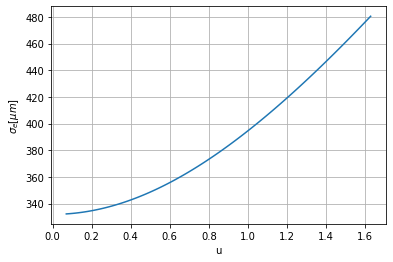

mean value =  388 [μm]
value at u = 0 : 332 [μm]
------------------Quadrature Muchnoi ---------------------------
332 [μm]


In [22]:
print("------------------Quadrature---------------------------")
quadrature = np.sqrt(firstterm**2+secondterm**2+thirdterm**2+fourthterm**2+fifthterm**2+sixthterm**2)
plt.grid(True, which="both")
plt.plot(u,quadrature*1e6)
plt.xlabel('u')
plt.ylabel(r"$\sigma_{e}[μ m]$")
plt.show()
print("mean value = ","{:.0f}".format(np.mean(quadrature)*1e+6),r"[μm]")
print("value at u = 0 :","{:.0f}".format(quadrature[1]*1e+6),r"[μm]")

print("------------------Quadrature Muchnoi ---------------------------")
last_term_Muchnoi = L2*np.tan(theta0)*(sigmad) 
approx = np.sqrt((sigma_x)**2+(sigma_xprime*L1)**2+(Dx**2+(L2*theta0)**2)*sigmad**2)
print("{:.0f}".format(approx*1e+6),r"[μm]")

#plt.grid(True, which="both")
#plt.plot(u,approx*1e6,"r-")
#plt.xlabel('u')
#plt.ylabel(r"$\sigma_{e}[μ m]$")
#plt.legend(["Muchnoi_Approximation"])
#plt.show()
#print("mean value = ",np.mean(approx)*1e+6)


In [ ]:
#error propagation for the different terms:

omega0 = 2.331     # eV
epsilon0 = 45.6e+9 # eV
mc2 = 0.511e+6     # eV
k = 4*omega0*epsilon0/(mc2**2)


gamma = 89237  #
epsilonx = 270e-12 # m rad
epsilony = 12e-12  # m rad
betax = 100        # m
betay = 20         # m
Dx = 25e-3         # m
theta0 = 2.1341e-3 # rad
UsCosTheta0 = 1/np.cos(theta0) 
sigmad = 0.001
L1 = 117           # m
L2 = 100           # m

umin = np.arctan(15e-5)/theta0

u = np.linspace(umin,k,100)
thetagamma = np.sqrt(k/u-1)
print(umin,k)

sigma_x = np.sqrt(epsilonx*betax) 
sigma_y = np.sqrt(epsilony*betay)


sigma_xprime = np.sqrt(epsilonx/betax) 
sigma_yprime = np.sqrt(epsilony/betay)

print("---------------the sigma terms given in microns ----------")
print("sigma_x = ","{:.3f}".format(sigma_x*1e+6))
print("sigma_y = ","{:.3f}".format(sigma_y*1e+6))
print("sigma_xprime = ","{:.3f}".format(sigma_xprime*1e+6))
print("sigma_yprime = ","{:.3f}".format(sigma_yprime*1e+6))



firstterm = Dx*UsCosTheta0*sigmad 
secondterm = UsCosTheta0*sigma_x 
thirdterm = UsCosTheta0*L1*(np.cos(sigma_xprime)**(-2))*sigma_xprime
fourthterm = UsCosTheta0*L1*(np.cos(thetagamma/(gamma*(1+0)))**(-2))*(thetagamma/(gamma*(1+0)**2))*sigmad
 
terms = [firstterm,secondterm,thirdterm,fourthterm]
labels = [r"$\sigma_{\theta_\gamma}[μ m]$", "Sigma_5"]


for i in range(4):
    print("---------------the term %d is given in microns ----------" %(i+1))
    if (i!=3 and i!=4):
        print("{:.2f}".format(terms[i]*1e+6))
    
    if (i==3 or i==4):
        print("{:.3f}".format(np.max(terms[i]*1e+6)))
        plt.grid(True, which="both")
        plt.plot(u,terms[i]*1e6)
        plt.xlabel('u')
        plt.ylabel(labels[i-3])
        plt.legend([labels[i-3]])
        plt.show()
        
        
quadrature_gamma = np.sqrt(firstterm**2+secondterm**2+thirdterm**2+fourthterm**2)
plt.grid(True, which="both")
plt.plot(u,quadrature_gamma*1e6)
plt.xlabel('u')
plt.ylabel(r"$\sigma_{\gamma}[μ m]$")
plt.show()
print("mean value = ",np.mean(quadrature_gamma)*1e+6)

In [26]:
def cross_X_Muchnoi(sigmax,sigmaxprime,L1,L2,Dx,theta0,sigmadelta):
    return (sigmax**2 + (sigmaxprime*L1)**2 + ((Dx-L2*theta0)*sigmadelta)**2)**0.5
    
    

In [19]:
class parameters:
    omega0 = 2.331     # eV
    epsinon0 = 45.6e+9 # eV
    mc2 = 0.511e+6     # eV
    k = 4*omega0*epsilon0/(mc2**2)


    gamma = 89237  #
    epsilonx = 270e-12 # m rad
    epsilony = 12e-12  # m rad
    betax = 100        # m
    betay = 20         # m
    Dx = 25e-3         # m
    theta0 = 2.1341e-3 # rad
    UsCosTheta0 = 1/np.cos(theta0) 
    sigmad = 0.001
    L1 = 117           # m
    L2 = 100           # m
    
    umin = np.arctan(15e-5)/theta0

    u = np.linspace(umin,k,100)
    thetae = np.sqrt(u*(k-u))
    thetagamma = np.sqrt(k/u-1)
    sigma_x = np.sqrt(epsilonx*betax) 
    sigma_y = np.sqrt(epsilony*betay)


    sigma_xprime = np.sqrt(epsilonx/betax) 
    sigma_yprime = np.sqrt(epsilony/betay)

In [27]:
cross_X_Muchnoi(parameters.sigma_x,parameters.sigma_xprime,parameters.L1,parameters.L2,parameters.Dx,parameters.theta0,parameters.sigmad)*1e+6

315.37062022325415